In [1]:
# Clustering
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# split the train data into independent variables (X) and dependent variable (Y)
x_iris = iris.drop('species', axis = 1)
#x_iris = x_iris.drop(['sepal_length','sepal_width'], axis = 1)
print(x_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [4]:
x_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [5]:
# apply KMeans model to group the data
from sklearn.cluster import KMeans
KMC = KMeans(n_clusters = 3)
KMC.fit(x_iris)
y_KMC = KMC.predict(x_iris)

In [6]:
print(KMC.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [7]:
KMC.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# sum of squareas of all observations from corresponding centriod
print(KMC.inertia_)

78.85144142614601


In [9]:
# include new column 'cluster' to iris data
iris ["cluster"] = KMC.labels_
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


In [10]:
import pandas as pd
pd.unique(iris["cluster"])

array([1, 0, 2])

In [11]:
pd.unique(iris["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
# label enconding
import numpy as np
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
iris.species = LE.fit_transform(iris.species)
np.unique(iris.species)

array([0, 1, 2])

In [17]:
iris.species[iris.species==0] = 3
np.unique(iris.species)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 2, 3])

In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

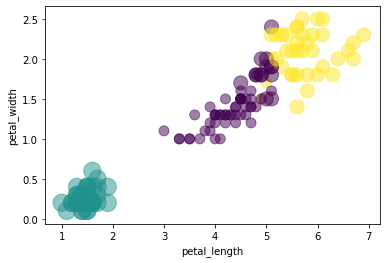

In [18]:
# 3 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.petal_length,
            iris.petal_width,
            s = 100*iris.species,                  # size of dot depends on thrid feature
            alpha = 0.5,                           # transeperency level
            c = iris.cluster,                      # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[2])
plt.ylabel(iris.columns.values[3])
plt.show()

In [21]:
iris[(iris.species == 3)]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,3,1
1,4.9,3.0,1.4,0.2,3,1
2,4.7,3.2,1.3,0.2,3,1
3,4.6,3.1,1.5,0.2,3,1
4,5.0,3.6,1.4,0.2,3,1
5,5.4,3.9,1.7,0.4,3,1
6,4.6,3.4,1.4,0.3,3,1
7,5.0,3.4,1.5,0.2,3,1
8,4.4,2.9,1.4,0.2,3,1
9,4.9,3.1,1.5,0.1,3,1


In [22]:
from sklearn.metrics import silhouette_score
ithinss1 = 0
ratio = list()
shscore = list()
for i in np.arange(1,11):
    KMC = KMeans(n_clusters = i)
    KMC.fit(x_iris)
    if i != 1:
        shscore.append(silhouette_score(X=x_iris,labels=KMC.labels_))
    if i == 1:
        TotalSS = KMC.inertia_
    ratio.append (KMC.inertia_ / TotalSS)
print(ratio)

[1.0, 0.2235904392710192, 0.11572474865535146, 0.08399022971388216, 0.06816581468481624, 0.05729626028197761, 0.0505182851188828, 0.04405221028377356, 0.04158135707912752, 0.03836830773407678]


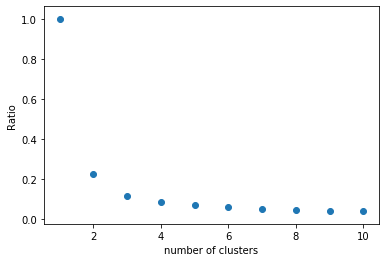

In [23]:
plt.scatter(np.arange(1,11),ratio)
plt.xlabel("number of clusters")
plt.ylabel("Ratio")
plt.show()

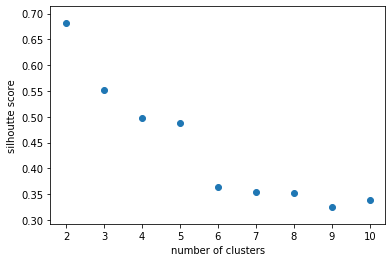

In [25]:
plt.scatter(np.arange(2,11),shscore)
plt.xlabel("number of clusters")
plt.ylabel("silhoutte score")
plt.show()